In [1]:
from poppy.creatures import Poppy4dofArmMini

la classe Poppy4dofArmMini est OK


In [2]:
mini_dof = Poppy4dofArmMini(simulator='vrep')

robot is setup


In [3]:
import time

In [ ]:
%pylab inline

In [4]:
from pypot.primitive import Primitive

In [5]:
class graph_primitive(Primitive):
    def __init__(self,robot,motors_name):
        self.robot = robot
        Primitive.__init__(self, robot)
        self.fake_motors={}
        for name in motors_name:
            self.fake_motors[name] = getattr(self.robot, name)  
        self.position={}
        self.load={}
        self.speed={}
        
    def setup(self):
        for m in self.fake_motors.keys():
            self.position[m] = []
            self.speed[m] = []
            self.load[m] = []
        self.python_time=[]
        self.pypot_time=[]
    
    def run(self):
        t0 = time.time()
        while not self.should_stop():
            for m in self.fake_motors.keys():
                self.position[m].append(self.fake_motors[m].present_position)
                self.load[m].append(self.fake_motors[m].present_load)
                self.speed[m].append(self.fake_motors[m].present_speed)
            self.python_time.append(time.time()-t0)
            self.pypot_time.append(self.elapsed_time)
            time.sleep(0.02)
            
            

## Tracking a loaded motor : m2

###Fast movement :

In [27]:
graph = graph_primitive(mini_dof,['m1','m2'])

In [16]:
graph.start()
mini_dof.m2.goto_position(90,1,wait=True)
graph.stop()



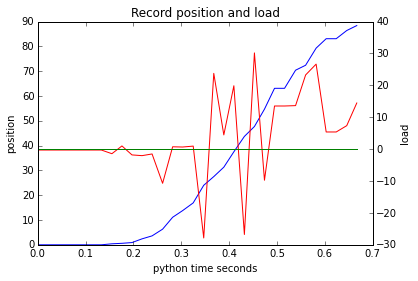

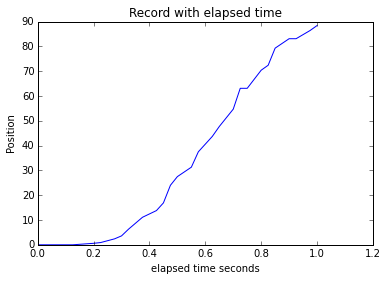

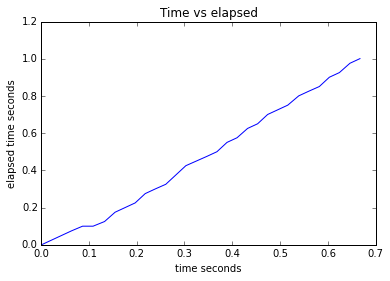

In [17]:
figure(1)            
plot(graph.python_time,graph.position['m2'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m2'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m2'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m2'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time')

figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [28]:
for m in mini_dof.motors:
    m.goto_position(0,1)

###Slow movement :

In [29]:
graph.start()
mini_dof.m2.goto_position(90,5,wait=True)
graph.stop()

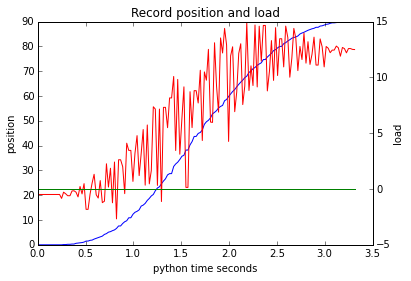

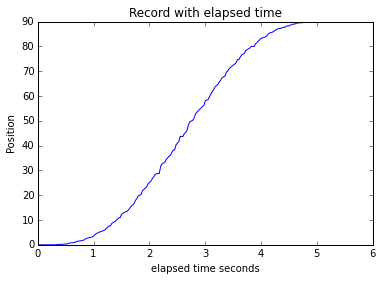

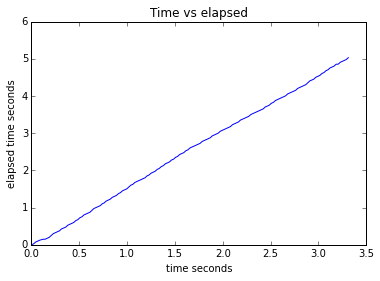

In [30]:
figure(1)            
plot(graph.python_time,graph.position['m2'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m2'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m2'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m2'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time')

figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [31]:
for m in mini_dof.motors:
    m.goto_position(0,1)

## Tracking an unloaded motor : m4

###Fast movement :

In [32]:
graph = graph_primitive(mini_dof,['m4',])

In [20]:
graph.start()
mini_dof.m4.goto_position(90,1,wait=True)
graph.stop()



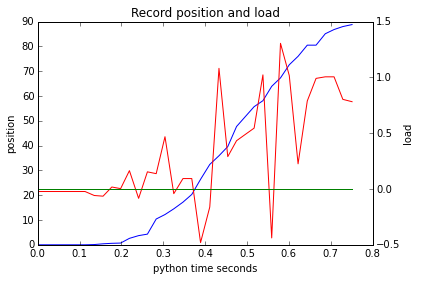

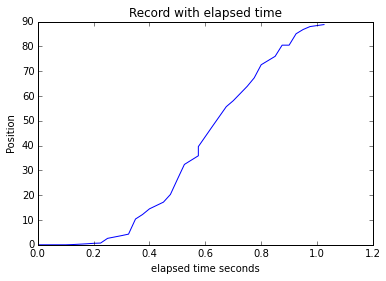

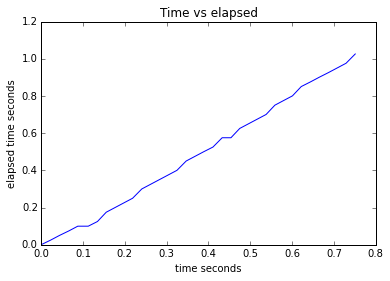

In [22]:
figure(1)            
plot(graph.python_time,graph.position['m4'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m4'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m4'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m4'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time')

figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [23]:
for m in mini_dof.motors:
    m.goto_position(0,1)

###Slow movement :

In [33]:
graph.start()
mini_dof.m4.goto_position(90,5,wait=True)
graph.stop()

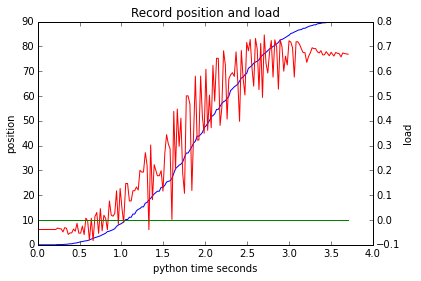

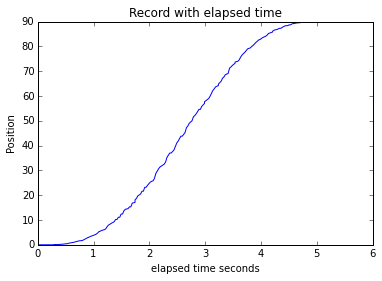

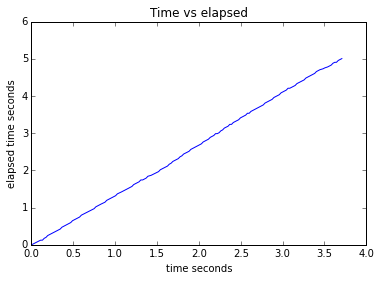

In [34]:
figure(1)            
plot(graph.python_time,graph.position['m4'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m4'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m4'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m4'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time')

figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [35]:
for m in mini_dof.motors:
    m.goto_position(0,1)

##Time dependant movement :

In [37]:
graph = graph_primitive(mini_dof,['m2',])

In [44]:
graph.start()
mini_dof.m2.goto_position(90,1,wait=True)
mini_dof.m2.goto_position(-90,1,wait=True)
mini_dof.m2.goto_position(90,1,wait=True)
mini_dof.m2.goto_position(-90,1,wait=True)
mini_dof.m2.goto_position(0,1,wait=True)
graph.stop()

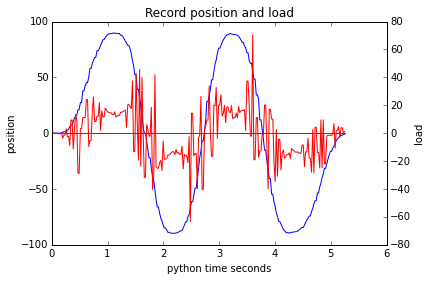

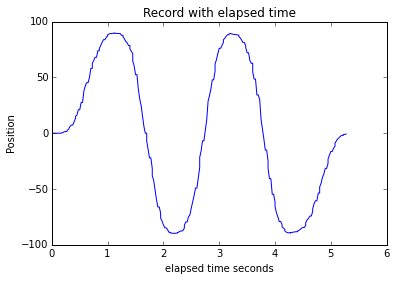

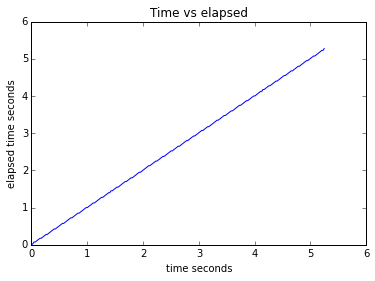

In [45]:
figure(1)            
plot(graph.python_time,graph.position['m2'],"b-")
xlabel('python time seconds')
ylabel('position')
twinx()
plot(graph.python_time,graph.load['m2'],"r-")
ylabel('load')
plot(graph.python_time,graph.speed['m2'],"g-")
title ('Record position and load')
figure(2)
plot(graph.pypot_time,graph.position['m2'])
xlabel('elapsed time seconds')
ylabel('Position')
title ('Record with elapsed time')

figure(3)
plot(graph.python_time,graph.pypot_time)
xlabel('time seconds')
ylabel('elapsed time seconds')
title ('Time vs elapsed')


In [143]:
mini_dof.close()